In [1]:
import json
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/home/jpivarski/storage/data/physicists/forks-of-cmssw-2022-03-04/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [3]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
0,35404785,helee,6985026,CATTools,2015-05-11 05:49:31+00:00,2015-08-08 11:32:53+00:00,2015-05-11 05:49:31+00:00,True,C++,2788,for cms analysis,None,None,0,0,0,0
1,35404621,helee,6985026,cmssw,2015-05-11 05:45:33+00:00,2015-12-04 09:13:52+00:00,2015-05-11 05:48:44+00:00,True,C++,834853,CMS Offline Software,http://cms-sw.github.io/,None,0,0,0,0
2,379129768,helee,6985026,CrabJobMonitoring,2021-06-22 03:25:55+00:00,2020-03-25 18:49:51+00:00,2021-06-22 03:25:56+00:00,True,None,45,crab job monitoring for SKFlatMaker,,None,0,0,0,0
3,132709357,helee,6985026,EgammaAnalysis-TnPTreeProducer,2018-05-09 06:06:02+00:00,2021-08-05 03:55:23+00:00,2018-05-09 06:06:04+00:00,True,Python,41153,TnP package for EGM,None,None,1,0,0,0
4,156663899,helee,6985026,egm_tnp_analysis,2018-11-08 06:59:13+00:00,2021-12-21 03:20:46+00:00,2018-11-08 06:59:15+00:00,True,Python,2932,package to analyse egm tnp trees,,None,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40343,16122368,hkaushalya,5091507,haddws,2014-01-21 23:24:01+00:00,2014-02-15 16:25:46+00:00,2021-09-09 13:34:32+00:00,False,C++,192,hadd with weights (or better hadd). Adds histo...,None,GNU General Public License v3.0,5,0,5,5
40344,16212173,hkaushalya,5091507,hadoop-R,2014-01-24 17:56:31+00:00,2012-10-17 21:40:49+00:00,2014-01-24 17:56:32+00:00,True,R,143,Example code for running R on Hadoop,,None,0,0,0,0
40345,19552028,hkaushalya,5091507,hkaushalya.github.io,2014-05-07 22:07:39+00:00,2014-05-07 22:17:07+00:00,2014-05-07 22:17:08+00:00,False,None,108,My first GitHub page,None,None,0,0,0,0
40346,284286671,msedghi-1305,68026516,cmssw,2020-08-01 15:28:47+00:00,2020-08-03 15:02:21+00:00,2020-08-03 15:02:29+00:00,True,C++,1126925,CMS Offline Software,http://cms-sw.github.io/,Apache License 2.0,0,0,0,0


In [4]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")
userrepos_cut["Julia"] = userrepos_cut["language"] == "Julia"
userrepos_cut["Java"] = userrepos_cut["language"] == "Java"
userrepos_cut["Fortran"] = userrepos_cut["language"] == "Fortran"

In [5]:
def smooth(series, colors, ax):
    for s, c in zip(series, colors):
        s[(pd.to_datetime("2013-01-01") < s.index.values) & (s.index.values < pd.to_datetime("2022-03-04"))].rolling(
            4, center=True, win_type="gaussian"
        ).mean(std=2).plot(color=c, ax=ax)

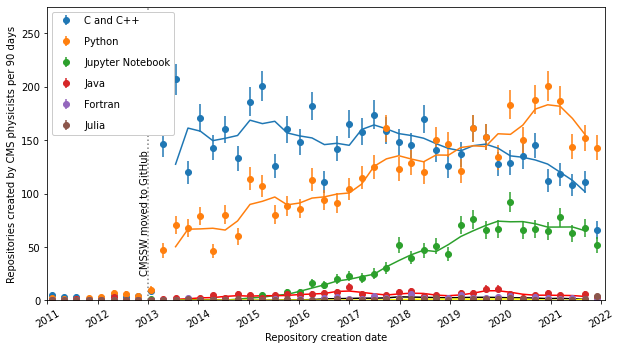

In [6]:
physicists = userrepos_cut.copy()
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter", "Java", "Fortran", "Julia"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([bylanguage["C and C++"], bylanguage["Python"], bylanguage["Jupyter"], bylanguage["Java"], bylanguage["Fortran"], bylanguage["Julia"]],
       ["tab:blue", "tab:orange", "tab:green", "red", "black", "yellow"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.3*275, "CMSSW moved to GitHub", rotation=90, va="center")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists per 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2022-02-01"))
ax.set_ylim(0, 275)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[6:], [
    "C and C++", "Python", "Jupyter Notebook", "Java", "Fortran", "Julia"
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS/gihub-repo-language.svg")
ax.get_figure().savefig("PLOTS/gihub-repo-language.pdf")

In [7]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2["Java"] = userrepos_cut2["language"] == "Java"
userrepos_cut2["Fortran"] = userrepos_cut2["language"] == "Fortran"
userrepos_cut2["Julia"] = userrepos_cut2["language"] == "Julia"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="90D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter", "Java", "Fortran", "Julia"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

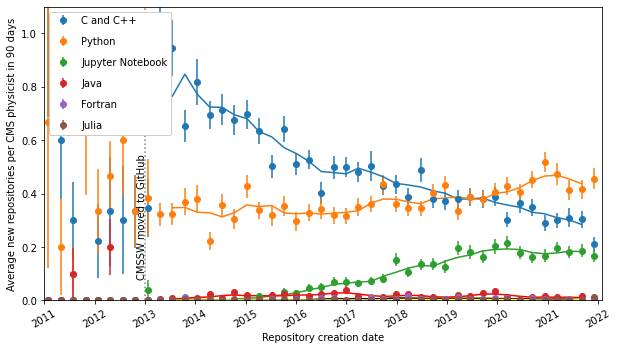

In [8]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 6))
smooth([y["C and C++"], y["Python"], y["Jupyter"], y["Java"], y["Fortran"], y["Julia"]],
       ["tab:blue", "tab:orange", "tab:green", "red", "black", "yellow"], ax)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.55, "CMSSW moved to GitHub", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average new repositories per CMS physicist in 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2022-02-01"))
ax.set_ylim(0, 1.1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[6:], [
    "C and C++", "Python", "Jupyter Notebook", "Java", "Fortran", "Julia"
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.get_figure().savefig("PLOTS/gihub-repo-language-byuser.svg")
ax.get_figure().savefig("PLOTS/gihub-repo-language-byuser.pdf")